# Advanced Imputation Techniques

Finally, go beyond simple imputation techniques and make the most of your dataset by using advanced imputation techniques that rely on machine learning models, to be able to accurately impute and evaluate your missing data. You will be using methods such as KNN and MICE in order to get the most out of your missing data! 

In [ ]:
import pandas as pd
from fancyimpute import KNN
from fancyimpute import IterativeImputer

diabetes = pd.read_csv("data/pima_indians_diabetes.csv")

## fancyimpute package

`'fancyimpute'` is a package containing several advanced imputation techniques that use machine learning algorithms to impute missing values.

In the previous lessons, we used imputation techniques like mean, median and mode imputations or interpolation. In these techniques, only the respective column was utilized for computing and imputing missing values. In contrast, the advanced imputation techniques use other columns as well to predict the missing values and impute them. Think of it as fitting a machine learning model to predict the missing values in a column using the remaining columns. 

## fancyimpute imputation techniques

* K-Nearest Neighbot (KNN)
* Multiple Imputation by Chained Equations (MICE)

### KNN

Finds the most similar data points based on the non-missing features and calculates their average to fill the missing features.

In [ ]:
from fancyimpute import KNN

diabetes_knn = diabetes.copy(deep=True)
knn_imputer = KNN()
diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn)

### MICE

MICE is a very robust and complex model for imputing missing values.

* performs multiple regressions over random samples of the data
* averages the values of those regressions
* imputes the missing feature values for the data point 

In [ ]:
from fancyimpute import IterativeImputer

diabetes_mice = diabetes.copy(deep=True)
mice_imputer = IterativeImputer()
diabetes_mice.iloc[:, :] = mice_imputer.fit_transform(diabetes_mice)

#### KNN imputation

Datasets always have features which are correlated. Hence, it becomes important to consider them as a factor for imputing missing values. Machine learning models use features in the DataFrame to find correlations and patterns and predict a selected feature.

One of the simplest and most efficient models is the K Nearest Neighbors. It finds 'K' points most similar to the existing data points to impute missing values.

In this exercise, the `diabetes` DataFrame has already been loaded for you. Use the `fancyimpute` package to impute the missing values in the `diabetes` DataFrame.

##### Instructions

* Import `KNN` from `fancyimpute`.
* Copy `diabetes` to `diabetes_knn_imputed`.
* Create a `KNN()` object and assign it to `knn_imputer`.
* Impute the `diabetes_knn_imputed` DataFrame.

In [ ]:
from fancyimpute import KNN

diabetes_knn_imputed = diabetes.copy(deep=True)
knn_imputer = KNN(verbose=False)
diabetes_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn_imputed)

#### MICE imputation

The `fancyimpute` package offers various robust machine learning models for imputing missing values. You can explore the complete list of imputers from the detailed [documentation](https://github.com/iskandr/fancyimpute)]. Here, we will use `IterativeImputer` or popularly called MICE for imputing missing values.

The `IterativeImputer` performs multiple regressions on random samples of the data and aggregates for imputing the missing values. You will use the `diabetes` DataFrame for performing this imputation.

##### Instructions

* Import `IterativeImputer` from `fancyimpute`.
* Copy `diabetes` to `diabetes_mice_imputed`.
* Create an `IterativeImputer()` object and assign it to `mice_imputer`.
* Impute the diabetes_mice_imputed DataFrame.


In [ ]:
from fancyimpute import IterativeImputer

diabetes_mice_imputed = diabetes.copy(deep=True)
mice_imputer = IterativeImputer()
diabetes_mice_imputed = mice_imputer.fit_transform(diabetes_mice_imputed)

## Imputing categorical values

* most categorical values are strings
* cannot directly perform imputation operations on strings
* must first encode strings as numeric values, then impute

## Encoding techniques

* one-hot encoding

    | Color | Color_Red | Color_ Green | Color_ Blue |
    |-------|:---------:|:------------:|:-----------:|
    | Red | 1 | 0 | 0 |
    | Green | 0 | 1 | 0 |
    | Blue | 0 | 0 | 1 |
    | Red | 1 | 0 | 0 |
    | Blue | 0 | 0 | 1 |
    | Blue | 0 | 0 | 1 |

* ordinal encoding

    | Color | Value |
    |-------|:-----:|
    | Red | 0 |
    | Green | 1 |
    | Blue | 2 |
    | Red | 0 |
    | Blue | 2 |
    | Blue | 2 |

The most simple way to impute is to fill in the most frequent value as we saw in Chapter 2.

Here, however, we will use statistical models like KNN.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

users = pd.read_csv("data/userprofile.csv")

users.head()

This data set contains only categorical values.

Our first step wil be to encode them as numeric values.

Caveat: `OrdinalEncoder` does not handle NaNs, so we must filter them out.

1. select a categorical variable from the data set ('ambience', will be of type `pd.Series`)
1. filter out the nulls leaving a Series of non-null values (`pd.Series`)
1. reshape the pd.Series into an x-by-1 ()`ndarray`)
1. transform categorical values to numeric
1. squeeze the array to remove any axis with length 1, assign the values in the squeezed `ndarray` to the non-null values in 'ambience' in order

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# ambience_ord_enc = OrdinalEncoder()

# ambience = users["ambience"]  # 1
# ambience_not_null = ambience[ambience.notnull()]  # 2
# reshaped_values = ambience_not_null.values.reshape(-1, 1)  # 3
# encoded_vals = ambience_ord_enc.fit_transform(reshaped_values)  # 4
# users.loc[ambience.notnull(), "ambience"] = np.squeeze(encoded_vals)  # 5

We can create a more generalized conversion by looping over all the categorical variables in the data set.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN

users = pd.read_csv("data/userprofile.csv")

# make a deep copy to preserve users for later comparison
encoded_users = users.copy(deep=True)

# extract just the categorical columns
categorical_columns = users.select_dtypes(include=["object"]).columns

encoders = {}

for col_name in categorical_columns:
    encoders[col_name] = OrdinalEncoder()
    column = encoded_users[col_name]

    non_null_values = column[column.notnull()]
    reshaped_values = non_null_values.values.reshape(-1, 1)

    encoded_values = encoders[col_name].fit_transform(reshaped_values)

    encoded_users.loc[column.notnull(), col_name] = np.squeeze(encoded_values)

## Imputing with KNN

Our next step is to impute the missing values in the DataFrame. We'll make a copy so we can perform comparisons later.

In [ ]:
users_knn_imputed = encoded_users.copy(deep=True)
knn_imputer = KNN(verbose=False)

users_knn_imputed.iloc[:, :] = np.round(knn_imputer.fit_transform(encoded_users))

for col_name in categorical_columns:
    reshaped = users_knn_imputed[col_name].values.reshape(-1, 1)

    inverted_values = encoders[col_name].inverse_transform(reshaped)
    users_knn_imputed[col_name] = np.squeeze(inverted_values)

#### Ordinal encoding of a categorical column

Imputing categorical values involves a few additional steps over imputing numerical values. You need to first convert them to numerical values as statistical operations cannot be performed on strings.

You will use the user profile dataset which contains customer preferences and choices recorded by a restaurant. It contains only categorical features. In this exercise, you will convert the categorical column `'ambience'` to a numerical one using `OrdinalEncoder` from `sklearn`. The DataFrame has been loaded for you as `users`. The function `OrdinalEncoder()` has also been loaded.

The `head()` and `tail()` of `users` DataFrame has been printed for you.

##### Instructions

* Create the ordinal encoder object and assign it to `ambience_ord_enc`.
* Select the non-missing values of the `'ambience'` column in `users`.
* Reshape `ambience_not_null` to shape `(-1, 1)`.
* Replace the non-missing values of `ambience` with its encoded values.

In [ ]:
# Set col_name to 'ambience'
col_name = "ambience"
# Create Ordinal encoder
ambience_ord_enc = OrdinalEncoder()

# Select non-null values of ambience column in users
ambience = users[col_name]
ambience_not_null = ambience[ambience.notnull()]

# Reshape ambience_not_null to shape (-1, 1)
reshaped_vals = ambience_not_null.values.reshape(-1, 1)

# Select the non-null values for the column col_name in users and store the encoded values
encoded_vals = ambience_ord_enc.fit_transform(reshaped_vals)
users.loc[ambience.notnull(), col_name] = np.squeeze(encoded_vals)

#### Ordinal encoding of a DataFrame

Categorical features can be encoded using two techniques namely, one-hot encoding and ordinal encoding. In one-hot encoding, each category becomes a column and the respective category column for each row is 1 and the others 0. In ordinal encoding, the categories are mapped to integer values starting from 0 to number of categories.

In this exercise, you will loop over all the columns in the `users` DataFrame to ordinally encode the categories. You will also store an encoder for each column in a dictionary `ordinal_enc_dict` so that the encoded columns can be converted back to the original categories.

##### Instructions

* Define an empty dictionary `ordinal_enc_dict`.
* Create an Ordinal Encoder object for each column.
* Select non-null values of column in users and encode them.
* Assign back the encoded values to non-null values of each column (`col_name`) in users.

In [ ]:
# Create an empty dictionary ordinal_enc_dict
ordinal_enc_dict = {}

for col_name in users:
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = users[col_name]

    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)

    # Select the non-null values for the column col_name in users and store the encoded values
    users.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

#### KNN imputation of categorical values

Once all the categorical columns in the DataFrame have been converted to ordinal values, the DataFrame is ready to be imputed. Imputing using statistical models like K-Nearest Neighbors (KNN) provides better imputations.

In this exercise, you'll

1. Use the `KNN()` function from `fancyimpute` to impute the missing values in the ordinally encoded DataFrame `users`.
1. Convert the ordinal values back to their respective categories using the ordinal encoder's `.inverse_transform()` method.

Remember, `ordinal_enc_dict` stores `sklearn`'s `OrdinalEncoder()` for each column. The `users` DataFrame stores the encoded values (ordinal values) for each column.

The `KNN()` function, the dictionary of `OrdinalEncoder()`s `ordinal_enc_dict` and the `users` DataFrame have already been loaded for you.

##### Instructions

* Impute the `users` DataFrame using `KNN_imputer`'s `fit_transform()` method. These transformed values are rounded to get integers.
* Iterate over columns in `users`.
* Select the column's `OrdinalEncoder()` from `ordinal_enc_dict` and perform `.inverse_transform()` on the reshaped array `reshaped`.

In [ ]:
# Create KNN imputer
KNN_imputer = KNN(verbose=False)

# Impute 'users' DataFrame. It is rounded to get integer values
users_KNN_imputed.iloc[:, :] = np.round(KNN_imputer.fit_transform(users))

# Loop over the column names in 'users'
for col_name in users:
    # Reshape the column data
    reshaped = users_KNN_imputed[col_name].values.reshape(-1, 1)

    # Select the column's Encoder and perform inverse transform on 'reshaped'
    users_KNN_imputed[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

## Evaluation of different imputation techniques

We impute missing data in order to improve model performance and decrease bias.

A good way to measure the quality of imputations is to look at how a machine learning model performs against each imputation. The imputation with the maximum machine learning model is selected.

### Evaluation techniques

* Linear regression
* Comparing the density plot of the imputation against that of the original data to see which are most simiar

 We can use the `statsmodels` library

In [1]:
import pandas as pd
import statsmodels.api as sm

diabetes = pd.read_csv("data/pima_indians_diabetes.csv")

diabetes_cc = diabetes.dropna(how="any")  # diabetes complete case
X = sm.add_constant(diabetes_cc.iloc[:, :-1])  # exclude the target column, 'Class'
y = diabetes_cc["Class"]
lm = sm.OLS(y, X).fit()  # train the linear model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.65e-31
Time:                        15:12:03   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1027      0.144     -7.681      0.000      -1.385      -0.820
Pregnant              0.0130      0.008      1.549      0.122      -0.003       0.029
Glucose               0.0064      0.001      7.855      0.000       0.005       0.008
Diastolic_BP       5.465e-05      0.002      0.032      0.975      -0.003       0.003
Skin_Fold             0.0017      0.003      0.665      0.506      -0.003       0.007
Serum_Insulin        -0.0001      0.000     -0.603      0.547      -0.001       0.000
BMI                   0.0093      0.004      2.391      0.017       0.002       0.017
Diabetes_Pedigree     0.1572      0.058      2.708      0.007       0.043       0.271
Age                   0.0059      0.003      2.109      0.036       0.000       0.011
==============================================================================
Omnibus:                        9.511   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.387
Skew:                           0.344   Prob(JB):                      0.00916
Kurtosis:                       2.682   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The adjusted R-squared and teh coefficients can be used to evaluate the model's performance.

R-squared measures the accuracy of the machine learning model, the coefficients explain the weights of different features in the data.

The higher the R-squared the better the model. We can get the R-Squared and coefficients of the model with the attributes `lm.rsquared_adj` and `lm.params` respectively.

In [ ]:
lm.rsquared_adj

In [ ]:
lm.params

Fit linear model on different imputed DataFrames

In [3]:
from sklearn.impute import SimpleImputer
from fancyimpute import KNN
from fancyimpute import IterativeImputer

diabetes_mean = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

diabetes_knn = diabetes.copy(deep=True)
knn_imputer = KNN(verbose=False)
diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn)

diabetes_mice = diabetes.copy(deep=True)
mice_imputer = IterativeImputer()
diabetes_mice.iloc[:, :] = mice_imputer.fit_transform(diabetes_mice)

In [4]:
# mean imputation
X = sm.add_constant(diabetes_mean.iloc[:, :-1])
y = diabetes["Class"]
lm_mean = sm.OLS(y, X).fit()

# KNN imputation
X = sm.add_constant(diabetes_knn.iloc[:, :-1])
y = diabetes["Class"]
lm_knn = sm.OLS(y, X).fit()

# MICE imputation
X = sm.add_constant(diabetes_mice.iloc[:, :-1])
y = diabetes["Class"]
lm_mice = sm.OLS(y, X).fit()

### Comparing R-squared of different

WE can compare all the R-squares by creating a temporary DataFrame for cleaning printing their values.

In [7]:
print(
    pd.DataFrame(
        {
            "Complete": lm.rsquared_adj,
            "Mean Imp.": lm_mean.rsquared_adj,
            "KNN Imp.": lm_knn.rsquared_adj,
            "MICE Imp.": lm_mice.rsquared_adj,
        },
        index=["R_squared_adj"],
    )
)

               Complete  Mean Imp.  KNN Imp.  MICE Imp.
R_squared_adj  0.332108   0.313781  0.316505   0.316534


Note that mean imputation has the least R-squared as it imputes the same mean value throughout a column. The complete case has the highest R-squared as half the rows (those with missing values) have been dropped for fitting the linear model. 

We can similarly compare the coefficients of each of the imputations.

In [8]:
print(
    pd.DataFrame(
        {
            "Complete": lm.params,
            "Mean Imp": lm_mean.params,
            "KNN Imp.": lm_knn.params,
            "MICE Imp.": lm_mice.params,
        }
    )
)

                   Complete  Mean Imp  KNN Imp.  MICE Imp.
const             -1.102677 -1.024005 -1.027586  -1.035018
Pregnant           0.012953  0.020693  0.020074   0.020380
Glucose            0.006409  0.006467  0.006593   0.006638
Diastolic_BP       0.000055 -0.001137 -0.001191  -0.001220
Skin_Fold          0.001678  0.000193  0.001744   0.000569
Serum_Insulin     -0.000123 -0.000090 -0.000129  -0.000116
BMI                0.009325  0.014376  0.013103   0.014147
Diabetes_Pedigree  0.157192  0.129282  0.127763   0.127947
Age                0.005878  0.002092  0.002036   0.002051


The columns `Glucose`, `Diastolic_BP`, `Skin_Fold`, `Serum_Insulin` and `BMI` show that the imputed values add more weight to reinforce these features in the imputations. 

### Comparing density plots

Text(0.5, 0, 'Skin Fold')

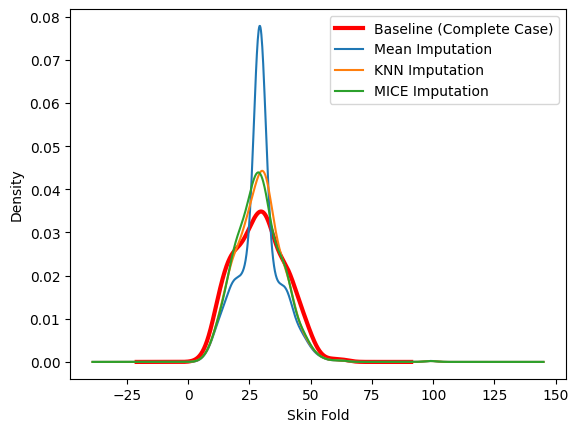

In [10]:
import matplotlib.pyplot as plt

diabetes_cc["Skin_Fold"].plot(kind="kde", c="red", linewidth=3)
diabetes_mean["Skin_Fold"].plot(kind="kde")
diabetes_knn["Skin_Fold"].plot(kind="kde")
diabetes_mice["Skin_Fold"].plot(kind="kde")

labels = ["Baseline (Complete Case)", "Mean Imputation", "KNN Imputation", "MICE Imputation"]
plt.legend(labels)
plt.xlabel("Skin Fold")

Note that the mean imputation is completely out of shape as compared to the other imputations. The KNN and MICE imputations are much more identical to the base DataFrame with the peak of MICE imputation being slightly shifted! 

#### Analyze the summary of linear model

Analyzing the performance of the different imputed models is one of the most significant tasks in dealing with missing data. It determines, the type of imputed DataFrame you can rely upon. For analysis, you can fit a linear regression model on the imputed DataFrame and check for various parameters that impact the selection of the imputation type.

In this exercise, you have already been loaded with the DataFrame `diabetes_cc` which is the complete case of diabetes DataFrame. The complete case acts as a base for comparison against other imputed DataFrames. You will use the package `statsmodels.api` loaded as `sm` for creating a linear regression model and generating summaries.

##### Instructions 1/4

* Set all features in the DataFrame `diabetes_cc` as `X` by adding a constant, while excluding and setting the `'Class'` column as y.

In [1]:
# setup
import pandas as pd
import statsmodels.api as sm

from sklearn.impute import SimpleImputer
from fancyimpute import KNN
from fancyimpute import IterativeImputer

diabetes = pd.read_csv("data/pima_indians_diabetes.csv")

diabetes_mean = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy="mean")
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

diabetes_knn = diabetes.copy(deep=True)
knn_imputer = KNN(verbose=False)
diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn)

diabetes_mice = diabetes.copy(deep=True)
mice_imputer = IterativeImputer()
diabetes_mice.iloc[:, :] = mice_imputer.fit_transform(diabetes_mice)

In [2]:
diabetes_cc = diabetes.dropna(how="any")
X = sm.add_constant(diabetes_cc.iloc[:, :-1])
y = diabetes_cc["Class"]
lm = sm.OLS(y, X).fit()

##### Instructions 2/4

* Print the summary of the linear model `lm`.

In [5]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.65e-31
Time:                        15:42:38   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1027      0.14

##### Instructions 3/4

* Print the adjusted R-squared score of linear model `lm`.

In [6]:
print("\nAdjusted R-squared score: ", lm.rsquared_adj)


Adjusted R-squared score:  0.33210805003287613


##### Instructions 4/4

* Print the .params of the linear model.

In [7]:
print("\nCoefficcients:\n", lm.params)


Coefficcients:
 const               -1.102677
Pregnant             0.012953
Glucose              0.006409
Diastolic_BP         0.000055
Skin_Fold            0.001678
Serum_Insulin       -0.000123
BMI                  0.009325
Diabetes_Pedigree    0.157192
Age                  0.005878
dtype: float64


#### Comparing and choosing the best adjusted R-squared

During the analysis of imputed DataFrames on a linear model, the adjusted R-squared ($adj. R^2$) score that explains the best fit model.

In this exercise, you will compare the $adj. R^2$ scores of the ***linear models*** (for each of the imputed datasets) you created earlier, namely `lm_mean`, `lm_KNN` and `lm_MICE` respectively.

You will first neatly print (by creating a DataFrame) their attributes `rsquared_adj` and finally choose the model with maximum $adj. R^2$.

The above models have already been loaded for you as `lm_mean`, `lm_KNN` and `lm_MICE`.

##### Instructions 1/2
* Use the `.rsquared_adj` attribute on each of the models `lm_mean`, `lm_KNN` and `lm_MICE` to create `rsquared_df`.

In [8]:
# setup
X = sm.add_constant(diabetes_mean.iloc[:, :-1])
y = diabetes["Class"]
lm_mean = sm.OLS(y, X).fit()

X = sm.add_constant(diabetes_knn.iloc[:, :-1])
y = diabetes["Class"]
lm_knn = sm.OLS(y, X).fit()

X = sm.add_constant(diabetes_mice.iloc[:, :-1])
y = diabetes["Class"]
lm_mice = sm.OLS(y, X).fit()

In [10]:
rsquared_df = pd.DataFrame(
    {
        "Mean Imputation": lm_mean.rsquared_adj,
        "KNN Imputation": lm_knn.rsquared_adj,
        "MICE Imputation": lm_mice.rsquared_adj,
    },
    index=["Adj. R-squared"],
)

print(rsquared_df)

                Mean Imputation  KNN Imputation  MICE Imputation
Adj. R-squared         0.313781        0.316505         0.316534


* Use the `max()` function to get the best R-squared from `rsquared_df`. The `key=rsquared_df.get` gets the respective score.

In [16]:
# best_imputation = max(rsquared_df, key=rsquared_df.get)
best_imputation = rsquared_df.idxmax(axis=1)

print("The best imputation technique is: ", best_imputation["Adj. R-squared"])

The best imputation technique is:  MICE Imputation


#### Comparing density plots

The different imputations that you have performed previously *can be graphically compared with their density plots*. From these plots, you will be able to easily analyze and find the dataset that has the most similar distribution when compared to the original dataset. You will also be able to see how an imputation can biased.

In this exercise, you will compare the density plots of the Imputed DataFrames for `diabetes` you created earlier.

The DataFrames `diabetes_cc`, `diabetes_mean_imputed`, `diabetes_knn_imputed` and `diabetes_mice_imputed` have already been loaded for you to use along with `matplotlib.pyplot` as `plt`.

##### Instructions

* Plot a density plot for the `'Skin_Fold'` column for each DataFrame.
* Set the labels using the `labels` list.
* Set the label for the x-axis to `'Skin Fold'`.


In [17]:
# setup
import matplotlib.pyplot as plt

# from sklearn.impute import SimpleImputer
# from fancyimpute import KNN
# from fancyimpute import IterativeImputer

# diabetes_mean = diabetes.copy(deep=True)
# mean_imputer = SimpleImputer(strategy="mean")
# diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

# diabetes_knn = diabetes.copy(deep=True)
# knn_imputer = KNN(verbose=False)
# diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn)

# diabetes_mice = diabetes.copy(deep=True)
# mice_imputer = IterativeImputer()
# diabetes_mice.iloc[:, :] = mice_imputer.fit_transform(diabetes_mice)

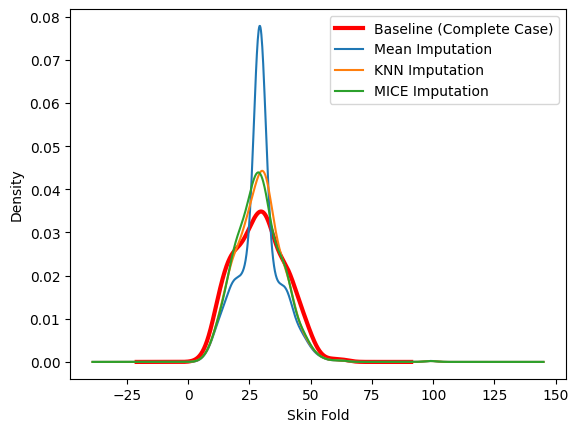

In [19]:
# Plot graphs of imputed DataFrames and the complete case
diabetes_cc["Skin_Fold"].plot(kind="kde", c="red", linewidth=3)
diabetes_mean["Skin_Fold"].plot(kind="kde")
diabetes_knn["Skin_Fold"].plot(kind="kde")
diabetes_mice["Skin_Fold"].plot(kind="kde")

# Create labels for the four DataFrames
labels = ["Baseline (Complete Case)", "Mean Imputation", "KNN Imputation", "MICE Imputation"]
plt.legend(labels)

# Set the x-label as Skin Fold
plt.xlabel("Skin Fold")

plt.show()